# Individual age of death and related factors

#### Javier Corpus

Loading the dataset and importing the required libraries.

In [2]:
import pandas as pd
import thinkstats2
import matplotlib.pyplot as plt
import thinkplot
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_json('IndividualAgeofDeath.json')

display(df)

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
0,100,219,m,74,136,n,n,0,1,1,...,n,0,n,y,203,n,n,y,n,y
1,66,242,m,73,111,n,n,0,1,1,...,y,0,n,n,228,n,n,n,n,n
2,31,197,f,65,112,n,n,7,1,2,...,y,3,n,y,183,n,n,n,n,n
3,42,244,f,69,127,n,n,1,2,3,...,n,2,n,y,228,n,n,n,n,n
4,93,183,f,63,91,y,n,2,3,3,...,y,2,n,n,169,n,n,n,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109,222,f,67,120,n,n,0,2,1,...,n,3,n,n,207,n,n,n,n,n
9996,33,284,f,69,138,y,n,0,3,2,...,y,3,n,y,270,n,n,n,y,n
9997,42,207,f,60,127,y,n,0,3,3,...,y,5,y,y,194,n,n,y,y,y
9998,84,186,f,66,137,n,n,4,1,3,...,n,2,n,n,170,n,n,n,n,n


Definition of functions.

In [3]:
# To get all the descriptive characteristics of a given variable
def get_stats(data):
    v_mean = thinkstats2.Mean(data)
    v_mode = round(data,2).mode()
    v_median = thinkstats2.Median(data)
    v_variance = thinkstats2.Var(data)
    v_skew = thinkstats2.Skewness(data)
    v_pms = thinkstats2.PearsonMedianSkewness(data)
    
    print("Descriptive characteristics: \n",
    "Median: ", round(v_median, 2),"\n",
    "Mean: ", round(v_mean, 2),"\n",
    "Spread: ", round(v_variance, 2),"\n",
    "Skewness:",round(v_skew, 2),"\n",
    "Pearson's Skewness:",round(v_pms, 2),"\n")

In [4]:
# Plotting a histogram of a given variable

def plot_histogram(data, title, xlabel):

    data.hist(bins = 80, color = "gray", edgecolor = "black", figsize = (10,6))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
# Gets a given number of random rows from a dataframa
def SampleRows(df, nrows):
    indices = np.random.choice(df.index, nrows)
    sample = df.loc[indices]

    return sample

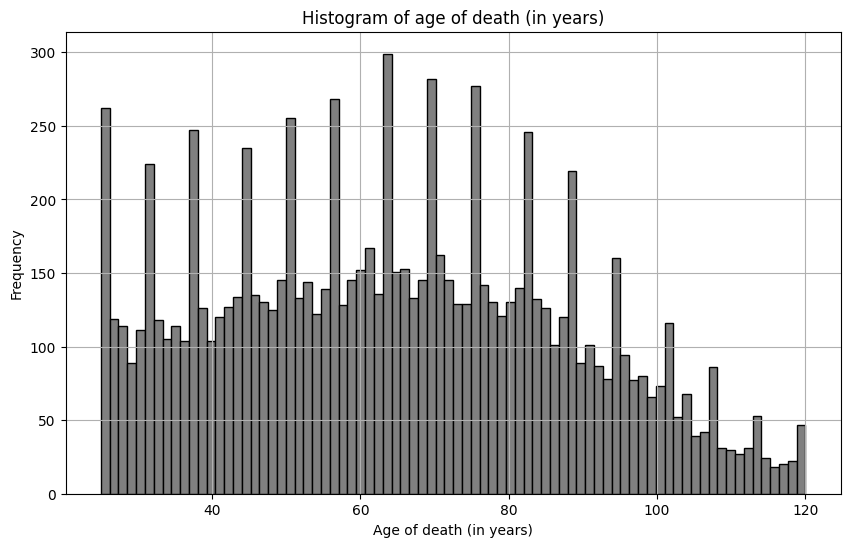

In [6]:
v_title = "Histogram of age of death (in years)"
v_xlabel = "Age of death (in years)" 
plot_histogram(df.age, v_title, v_xlabel)

In [7]:
get_stats(df.age)

Descriptive characteristics: 
 Median:  64 
 Mean:  64.64 
 Spread:  537.89 
 Skewness: 0.19 
 Pearson's Skewness: 0.08 



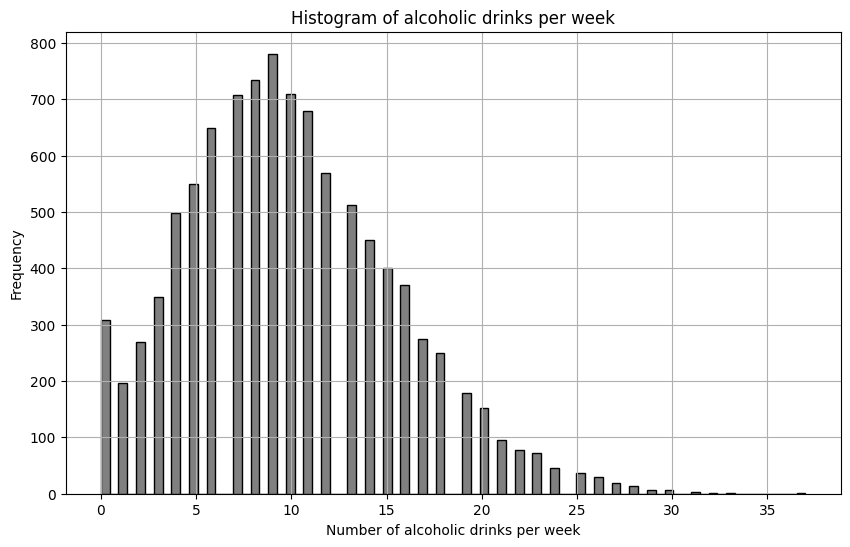

In [8]:
v_title = "Histogram of alcoholic drinks per week"
v_xlabel = "Number of alcoholic drinks per week" 
plot_histogram(df.drinks_aweek, v_title, v_xlabel)

In [9]:
get_stats(df.drinks_aweek)

Descriptive characteristics: 
 Median:  9 
 Mean:  9.98 
 Spread:  30.87 
 Skewness: 0.52 
 Pearson's Skewness: 0.53 



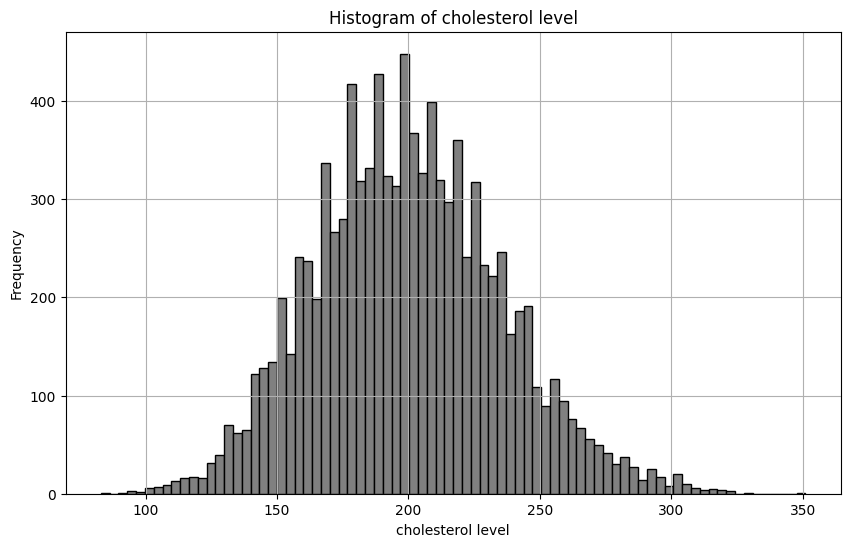

In [10]:
v_title = "Histogram of cholesterol level"
v_xlabel = "cholesterol level" 
plot_histogram(df.cholesterol, v_title, v_xlabel)

In [11]:
get_stats(df.cholesterol)

Descriptive characteristics: 
 Median:  199 
 Mean:  199.74 
 Spread:  1269.6 
 Skewness: 0.24 
 Pearson's Skewness: 0.06 



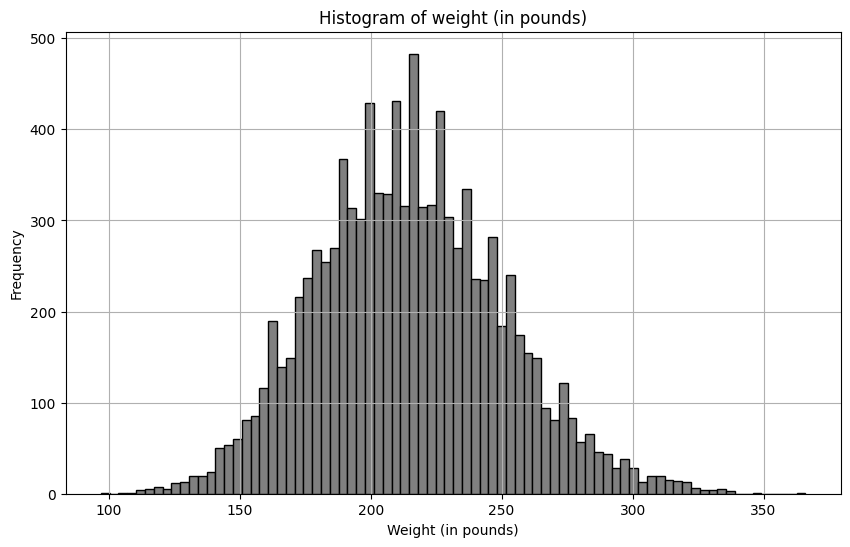

In [12]:
v_title = "Histogram of weight (in pounds)"
v_xlabel = "Weight (in pounds)" 
plot_histogram(df.weight, v_title, v_xlabel)

In [13]:
get_stats(df.weight)

Descriptive characteristics: 
 Median:  214 
 Mean:  214.73 
 Spread:  1269.01 
 Skewness: 0.24 
 Pearson's Skewness: 0.06 



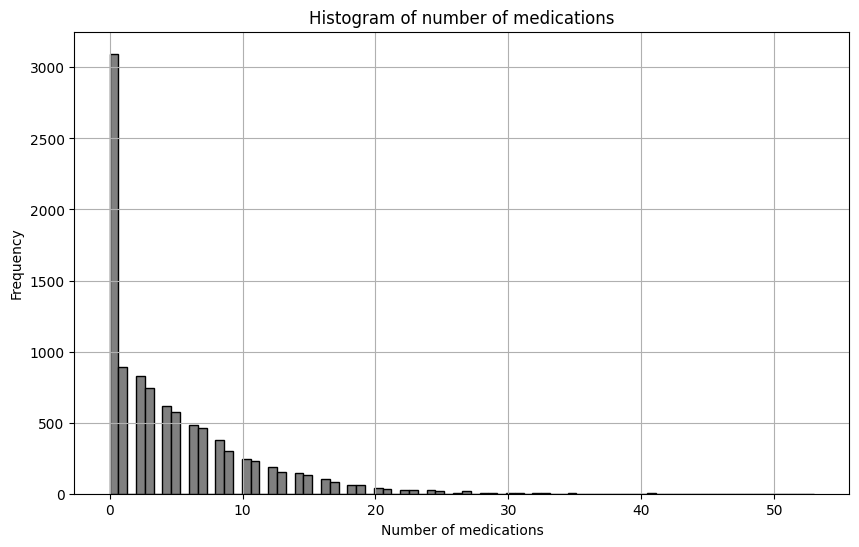

In [14]:
v_title = "Histogram of number of medications"
v_xlabel = "Number of medications" 
plot_histogram(df.num_meds, v_title, v_xlabel)

In [15]:
get_stats(df.num_meds)

Descriptive characteristics: 
 Median:  3 
 Mean:  4.59 
 Spread:  30.38 
 Skewness: 1.73 
 Pearson's Skewness: 0.87 



In [16]:
# Gets the data about smokers, male and female
def MakeFrames_Smokers():

    smokers = df[df.smoker == 'y']
    m_smokers = smokers[smokers.sex == 'm']
    f_smokers = smokers[smokers.sex == 'f']

    assert len(smokers) == 2006
    assert len(m_smokers) == 1006
    assert len(f_smokers) == 1000

    return smokers, m_smokers, f_smokers

In [17]:
smokers, m_smokers, f_smokers = MakeFrames_Smokers()

display(smokers)

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
4,93,183,f,63,91,y,n,2,3,3,...,y,2,n,n,169,n,n,n,n,n
6,84,220,f,63,112,y,y,0,2,2,...,n,0,n,n,204,n,n,n,n,y
10,98,236,f,68,114,y,n,0,2,1,...,n,3,n,n,219,n,n,n,n,n
26,39,188,f,67,113,y,n,5,2,2,...,y,3,y,n,174,n,n,y,n,n
28,51,188,f,59,132,y,n,14,3,2,...,n,10,n,n,173,n,n,n,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,50,223,f,61,107,y,n,8,2,3,...,y,6,n,y,207,n,n,n,n,n
9992,55,258,m,70,161,y,y,0,2,2,...,n,0,n,y,244,n,n,y,n,y
9993,50,228,f,67,110,y,n,3,2,1,...,n,1,n,y,212,n,n,y,n,y
9996,33,284,f,69,138,y,n,0,3,2,...,y,3,n,y,270,n,n,n,y,n


In [18]:
m_smokers_pmf = thinkstats2.Pmf(m_smokers.age, label="Male smokers")
f_smokers_pmf = thinkstats2.Pmf(f_smokers.age, label="Female smokers")

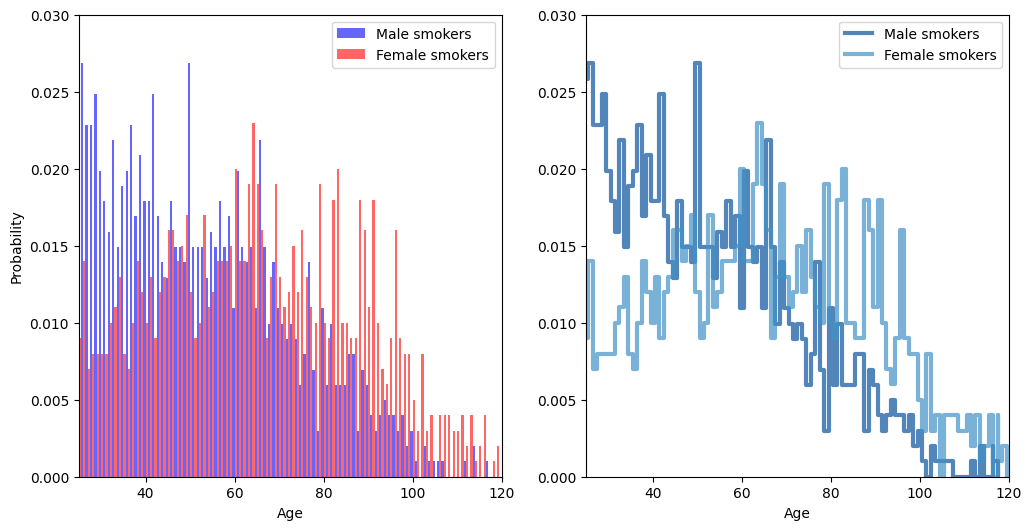

<Figure size 800x600 with 0 Axes>

In [19]:
width = 0.5
axis = [25, 120, 0, 0.03]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(m_smokers_pmf, align='right', width=width, color = 'blue')
thinkplot.Hist(f_smokers_pmf, align='left', width=width, color = 'red')
thinkplot.Config(xlabel='Age',
                ylabel='Probability',
                axis=axis)
                
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([m_smokers_pmf, f_smokers_pmf])
thinkplot.Show(xlabel='Age',
                axis=axis)

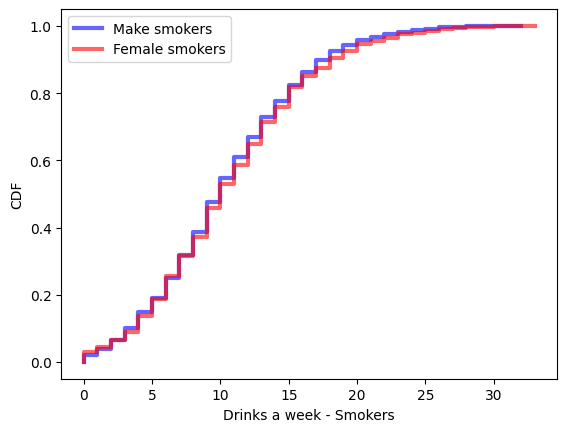

<Figure size 800x600 with 0 Axes>

In [20]:
m_smokers_cdf = thinkstats2.Cdf(m_smokers.drinks_aweek, label = 'Make smokers')
f_smokers_cdf = thinkstats2.Cdf(f_smokers.drinks_aweek, label = 'Female smokers')

thinkplot.Cdf(m_smokers_cdf, color = 'blue', alpha = 0.6)
thinkplot.Cdf(f_smokers_cdf, color = 'red', alpha = 0.6)

thinkplot.Show(xlabel = 'Drinks a week - Smokers', ylabel = 'CDF')

In [21]:
# Gets the data about males, smokers and non-smokers
def MakeFrames_Males():

    males = df[df.sex == 'm']
    m_smokers = males[males.smoker == 'y']
    m_non_smokers = males[males.smoker == 'n']

    assert len(males) == 4966
    assert len(m_smokers) == 1006
    assert len(m_non_smokers) == 3960

    return males, m_smokers, m_non_smokers

In [22]:
males, m_smokers, m_non_smokers = MakeFrames_Males()

display(males)

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
0,100,219,m,74,136,n,n,0,1,1,...,n,0,n,y,203,n,n,y,n,y
1,66,242,m,73,111,n,n,0,1,1,...,y,0,n,n,228,n,n,n,n,n
5,66,230,m,69,111,n,n,1,2,1,...,n,1,n,y,214,n,n,n,n,n
7,83,199,m,66,122,n,y,5,1,3,...,y,4,n,n,185,n,n,y,n,n
11,71,239,m,71,163,n,n,1,1,1,...,n,1,n,n,223,n,n,n,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,68,217,m,72,143,n,n,0,2,1,...,n,0,n,y,201,n,n,n,n,n
9989,42,256,m,78,152,n,y,1,1,3,...,n,3,n,n,240,n,y,n,n,n
9991,72,235,m,70,139,n,n,0,3,2,...,n,5,n,n,218,n,n,n,n,n
9992,55,258,m,70,161,y,y,0,2,2,...,n,0,n,y,244,n,n,y,n,y


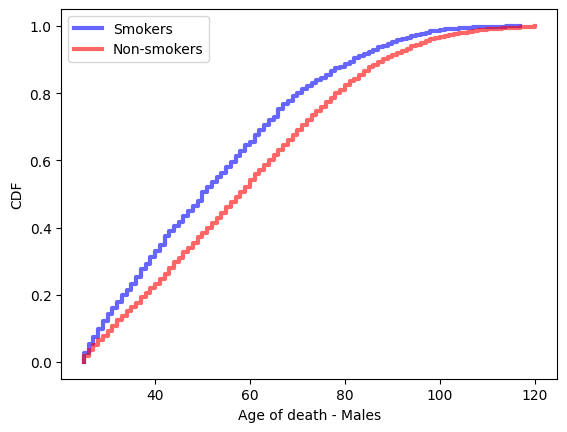

<Figure size 800x600 with 0 Axes>

In [23]:
m_smokers_cdf = thinkstats2.Cdf(m_smokers.age, label = 'Smokers')
m_non_smokers_cdf = thinkstats2.Cdf(m_non_smokers.age, label = 'Non-smokers')

thinkplot.Cdf(m_smokers_cdf, color = 'blue', alpha = 0.6)
thinkplot.Cdf(m_non_smokers_cdf, color = 'red', alpha = 0.6)

thinkplot.Show(xlabel = 'Age of death - Males', ylabel = 'CDF')

In [24]:
# Gets the data about females, smokers and non-smokers
def MakeFrames_Females():

    females = df[df.sex == 'f']
    f_smokers = females[females.smoker == 'y']
    f_non_smokers = females[females.smoker == 'n']

    assert len(females) == 5034
    assert len(f_smokers) == 1000
    assert len(f_non_smokers) == 4034

    return females, f_smokers, f_non_smokers

In [25]:
females, f_smokers, f_non_smokers = MakeFrames_Females()

display(females)

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
2,31,197,f,65,112,n,n,7,1,2,...,y,3,n,y,183,n,n,n,n,n
3,42,244,f,69,127,n,n,1,2,3,...,n,2,n,y,228,n,n,n,n,n
4,93,183,f,63,91,y,n,2,3,3,...,y,2,n,n,169,n,n,n,n,n
6,84,220,f,63,112,y,y,0,2,2,...,n,0,n,n,204,n,n,n,n,y
8,97,160,f,65,88,n,n,5,1,3,...,n,3,n,n,145,n,n,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,103,201,f,64,128,n,n,2,3,1,...,n,1,n,n,183,n,n,y,n,n
9995,109,222,f,67,120,n,n,0,2,1,...,n,3,n,n,207,n,n,n,n,n
9996,33,284,f,69,138,y,n,0,3,2,...,y,3,n,y,270,n,n,n,y,n
9997,42,207,f,60,127,y,n,0,3,3,...,y,5,y,y,194,n,n,y,y,y


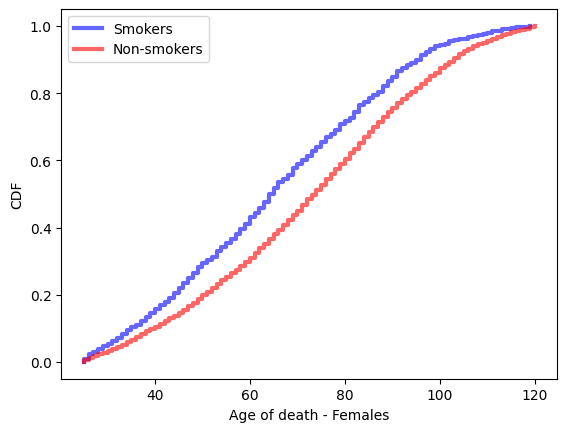

<Figure size 800x600 with 0 Axes>

In [26]:
f_smokers_cdf = thinkstats2.Cdf(f_smokers.age, label = 'Smokers')
f_non_smokers_cdf = thinkstats2.Cdf(f_non_smokers.age, label = 'Non-smokers')

thinkplot.Cdf(f_smokers_cdf, color = 'blue', alpha = 0.6)
thinkplot.Cdf(f_non_smokers_cdf, color = 'red', alpha = 0.6)

thinkplot.Show(xlabel = 'Age of death - Females', ylabel = 'CDF')

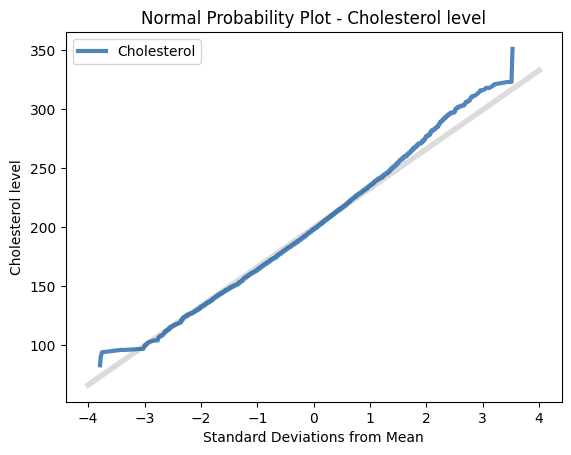

In [27]:
# Normal Probability plot


mean, var = thinkstats2.TrimmedMeanVar(df.cholesterol, p=0.01)
std = np.sqrt(var)
xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(df.cholesterol)
thinkplot.Plot(xs, ys, label="Cholesterol")

thinkplot.Config(
    title="Normal Probability Plot - Cholesterol level",
    xlabel="Standard Deviations from Mean",
    ylabel="Cholesterol level",) 

In [28]:
# Covariance
def Cov(xs, ys, meanx = None, meany = None): 
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    
    return cov


# Pearson's Correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)

    return corr


# Spearman correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    
    return Corr(xranks, yranks)

# Class definition for hypothesis test
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        
        return data



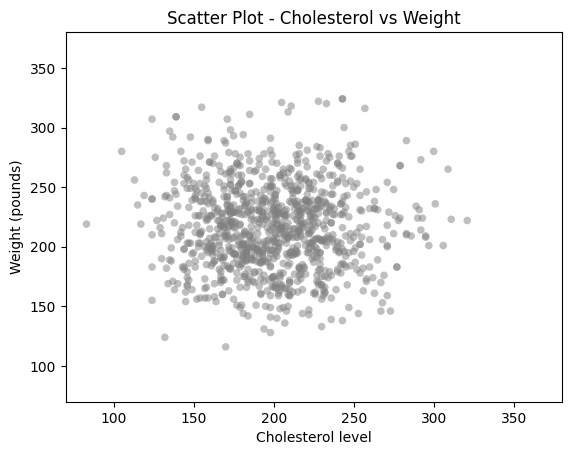

<Figure size 800x600 with 0 Axes>

In [29]:
# Scatter plot: Cholesterol vs Weight

sample = SampleRows(df, 1000)
sp_cholesterol, sp_weight = sample.cholesterol, sample.weight

axis = [70, 380, 70, 380]
thinkplot.Scatter(sp_cholesterol, sp_weight, color = "gray", alpha = 0.5)
thinkplot.Config(
    title="Scatter Plot - Cholesterol vs Weight",
    xlabel="Cholesterol level",
    ylabel="Weight (pounds)",) 
thinkplot.Show(axis = axis)


In [30]:
# Covariance and Correlations - Cholesterol vs Weight

cov_chol_wg = Cov(sp_cholesterol, sp_weight)
corr_chol_wg = Corr(sp_cholesterol, sp_weight)
spearman_corr_chol_wg = SpearmanCorr(sp_cholesterol, sp_weight)

print(f'Covariance: {cov_chol_wg}')
print(f'Correlation: {corr_chol_wg}')
print(f'Spearman\'s Correlation: {spearman_corr_chol_wg}')

Covariance: -19.761599999999998
Correlation: -0.015545618657786269
Spearman's Correlation: -0.012715156821576862


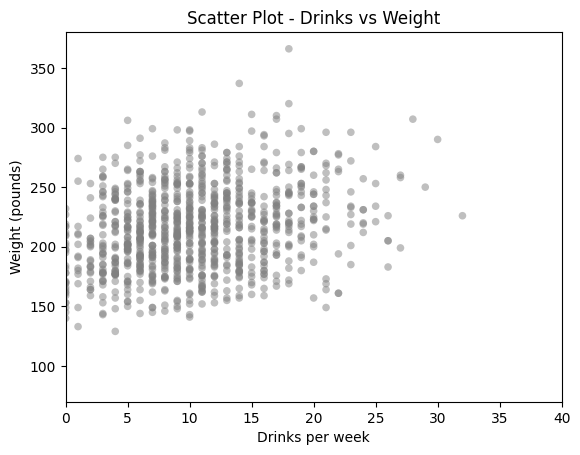

<Figure size 800x600 with 0 Axes>

In [31]:
# Scatter plot: Drinks per Week vs Weight

sample = SampleRows(df, 1000)
sp_drinks_aweek, sp_weight = sample.drinks_aweek, sample.weight

axis = [0, 40, 70, 380]
thinkplot.Scatter(sp_drinks_aweek, sp_weight, color = "gray", alpha = 0.5)
thinkplot.Config(
    title="Scatter Plot - Drinks vs Weight",
    xlabel="Drinks per week",
    ylabel="Weight (pounds)",) 
thinkplot.Show(axis = axis)

In [32]:
# Covariance and Correlations - Drinks vs Weight

cov_drinks_wg = Cov(sp_drinks_aweek, sp_weight)
corr_drinks_wg = Corr(sp_drinks_aweek, sp_weight)
spearman_corr_drinks_wg = SpearmanCorr(sp_drinks_aweek, sp_weight)

print(f'Covariance: {cov_drinks_wg}')
print(f'Correlation: {corr_drinks_wg}')
print(f'Spearman\'s Correlation: {spearman_corr_drinks_wg}')

Covariance: 54.13884999999999
Correlation: 0.2689200624513175
Spearman's Correlation: 0.25294222702438013


p-value: 0.0


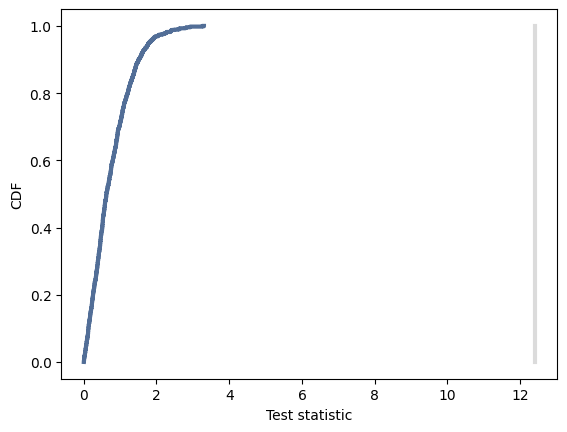

<Figure size 800x600 with 0 Axes>

In [33]:
# Defining data
data = m_smokers.age.values, f_smokers.age.values

# Running hypothesis test
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(f'p-value: {pvalue}')
ht.PlotCdf()
thinkplot.Show(xlabel='Test statistic',
                   ylabel='CDF')

In [35]:
# Linear Reggresion 
formula = 'age ~ smoker + drinks_aweek'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     1251.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:46:14   Log-Likelihood:                -44511.
No. Observations:               10000   AIC:                         8.903e+04
Df Residuals:                    9997   BIC:                         8.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       83.7736      0.435    192.484      0.000      82.920      84.627
smoker[T.y]     -5.5675      0.519    -10.735      0.000      -6.584      -4.551
drinks_aweek    -1.8051      0.037    -48.294      0.000      -1.878      -1.732
==============================================================================
Omnibus:                      226.057   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.549
Skew:                           0.107   Prob(JB):                     7.39e-29
Kurtosis:                       2.485   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""